# rdkit run reaction template
> A tutorial of using rdkit to run reaction template 

- toc: true 
- badges: true
- comments: true
- categories: [cheminformatics-rdkit]
<!-- - image: images/chart-preview.png -->

# About

This notebook is about using reaction template. RDKit supports applying chemical reactions to sets of molecules. In this notebook, I will show how to use RDKit tools to get reaction template from sets of reactions; to use reaction template to get possible products from known reactants, how to use reaction template as a retro-synthesis way. 

The code is firstly adapted from the documentaion of RDKit. I add more scripts to show more detailed functionalities of this tool.


# Getting template (smarts string) from the reactions.

Frist, let's import useful modules that we need in our script.

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdchiral import template_extractor

In [ ]:
#we need a reaction with atom mapping
#'reactant1.reactant2.>>product1.product2'
sample_rxn = '[CH3:1][CH2:2][O:3][C:4](=[O:5])[c:6]1[n:7][cH:8][c:9]([cH:10][c:11]1[Cl:12])[C:13](=[O:14])O.[CH3:15][C:16]([CH3:17])([CH3:18])[OH:19]>>[CH3:1][CH2:2][O:3][C:4](=[O:5])[c:6]1[n:7][cH:8][c:9]([cH:10][c:11]1[Cl:12])[C:13](=[O:14])[O:19][C:16]([CH3:15])([CH3:17])[CH3:18]'
reactants_smi, prods_smi = sample_rxn.split('>>')

In [ ]:
reactants_mol = Chem.MolFromSmiles(reactants_smi)
Draw.MolToImage(reactants_mol, (250,250))

In [ ]:
prods_mol = Chem.MolFromSmiles(prods_smi)
Draw.MolToImage(prods_mol, (250,250))

In [ ]:
rxn = {}
rxn['reactants'] = reactants_smi
rxn['products'] = prods_smi
rxn['_id'] = 1

In [ ]:
template = template_extractor.extract_from_reaction(rxn)
print(template)

In [ ]:
#visualize the template
products_mol = Chem.MolFromSmarts('[#7;a:5]:[c:4]:[c:3]-[C;H0;D3;+0:1](=[O;D1;H0:2])-[O;H0;D2;+0:10]-[C:7](-[C;D1;H3:6])(-[C;D1;H3:8])-[C;D1;H3:9]')
products_mol
Draw.MolToImage(products_mol, (250,250))

In [ ]:
reactants_mol = Chem.MolFromSmarts('O-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3]:[c:4]:[#7;a:5].[C;D1;H3:6]-[C:7](-[C;D1;H3:8])(-[C;D1;H3:9])-[OH;D1;+0:10]')
reactants_mol
Draw.MolToImage(reactants_mol, (250,250))

In [ ]:
#double check if the retro template can recover the initial reaction
reaction_smarts ='[#7;a:5]:[c:4]:[c:3]-[C;H0;D3;+0:1](=[O;D1;H0:2])-[O;H0;D2;+0:10]-[C:7](-[C;D1;H3:6])(-[C;D1;H3:8])-[C;D1;H3:9]>>O-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3]:[c:4]:[#7;a:5].[C;D1;H3:6]-[C:7](-[C;D1;H3:8])(-[C;D1;H3:9])-[OH;D1;+0:10]'
retro_rxn = AllChem.ReactionFromSmarts(reaction_smarts)
retro_rxn

# Using template (a reaction smarts) to get products from known reactants

In [17]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

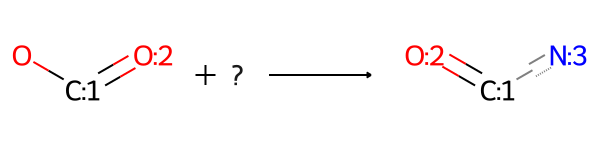

In [34]:
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]')
rxn

Let's take Suzuki Coupling for our practice.

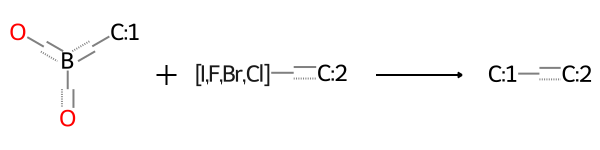

In [18]:
# This is a type of reactions called Suzuki Coupling
rxn = AllChem.ReactionFromSmarts('[c:1]B(O)O.[I,F,Br,Cl][c:2]>>[c:1][c:2]')
rxn

In [19]:
reacts = (Chem.MolFromSmiles('OB(C1=CC=CC=C1)O'),Chem.MolFromSmiles('BrC1=CC=C(S)C=C1'))#cannot exchange position
products = rxn.RunReactants(reacts)
products

((<rdkit.Chem.rdchem.Mol at 0x7f5379096030>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5379096090>,))

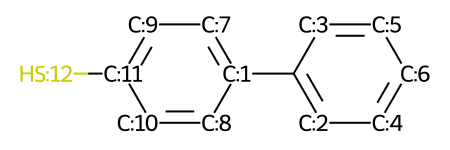

In [21]:
prod_mol = products[0][0]
mol_with_atom_index(prod_mol)

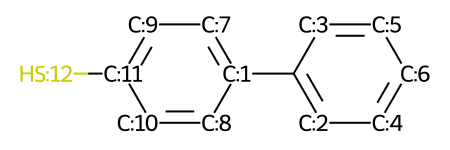

In [23]:
prod_mol = products[1][0]
mol_with_atom_index(prod_mol)

try to write another Suzuki reaction template

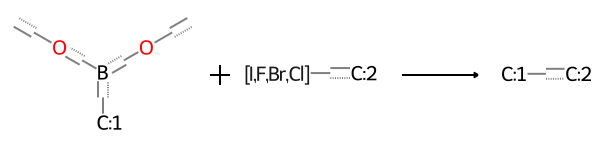

In [12]:
rxn = AllChem.ReactionFromSmarts('[c:1]B(O[CX4])O[CX4].[I,F,Br,Cl][c:2]>>[c:1][c:2]')
rxn


In [13]:
reacts = (Chem.MolFromSmiles('COB(C1=CC=CC=C1)OC'),Chem.MolFromSmiles('BrC1=CC=C(S)C=C1'))#cannot exchange position
products = rxn.RunReactants(reacts)
products

((<rdkit.Chem.rdchem.Mol at 0x7f5378f989f0>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5378f98b10>,))

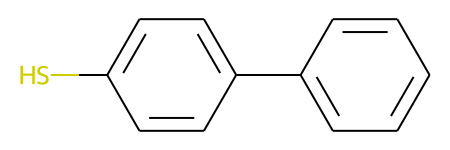

In [14]:
prod_mol = products[0][0]
prod_mol

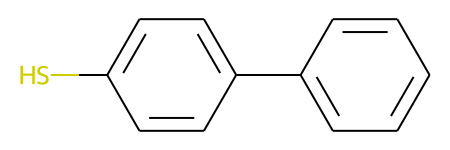

In [15]:
prod_mol = products[1][0]
prod_mol

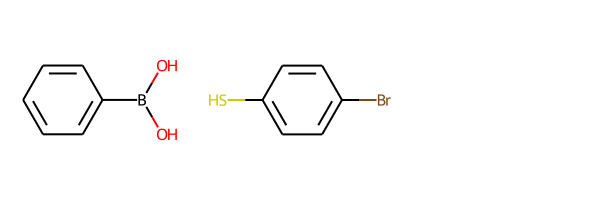

In [16]:
mol1 = Chem.MolFromSmiles('OB(C1=CC=CC=C1)O')
mol2 = Chem.MolFromSmiles('BrC1=CC=C(S)C=C1')
Draw.MolsToGridImage([mol1, mol2])

# Another template example, converting forward template into retro template

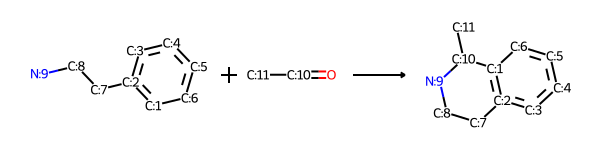

In [24]:
# Pictet-Spengler rxn
rxn = AllChem.ReactionFromSmarts('[cH1:1]1:[c:2](-[CH2:7]-[CH2:8]-[NH2:9]):[c:3]:[c:4]:[c:5]:[c:6]:1.[#6:11]-[CH1;R0:10]=[OD1]>>[c:1]12:[c:2](-[CH2:7]-[CH2:8]-[NH1:9]-[C:10]-2(-[#6:11])):[c:3]:[c:4]:[c:5]:[c:6]:1')
rxn #forward

In [ ]:
mol1 = Chem.MolFromSmiles('[cH1:1]1:[c:2](-[CH2:7]-[CH2:8]-[NH2:9]):[c:3]:[c:4]:[c:5]:[c:6]:1')
for atom in mol.GetAtoms():
    if atom.HasProp('molAtomMapNumber'):
        atom.ClearProp('molAtomMapNumber')
    smi1 = Chem.MolToSmiles(mol1)
print(smi1)
mol1_noidx = Chem.MolFromSmiles(smi1)
mol1_noidx

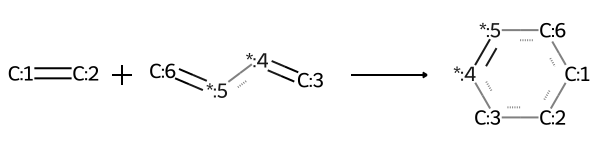

In [30]:
rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[*:4][*:5]=[C:6]>>[C:1]1[C:2][C:3][*:4]=[*:5][C:6]1')
rxn

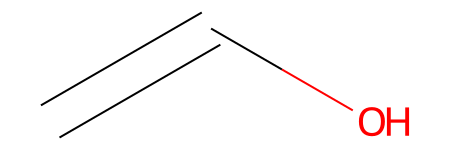

In [35]:
Chem.MolFromSmiles('OC=C')

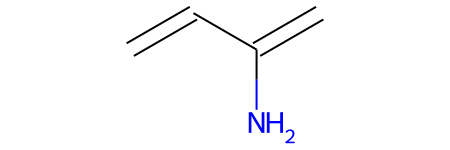

In [36]:
Chem.MolFromSmiles('C=CC(N)=C')

In [31]:
ps = rxn.RunReactants((Chem.MolFromSmiles('OC=C'), Chem.MolFromSmiles('C=CC(N)=C')))
ps

((<rdkit.Chem.rdchem.Mol at 0x7f5348cbb1b0>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5348cbbed0>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5348cbb150>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5348cbb270>,))

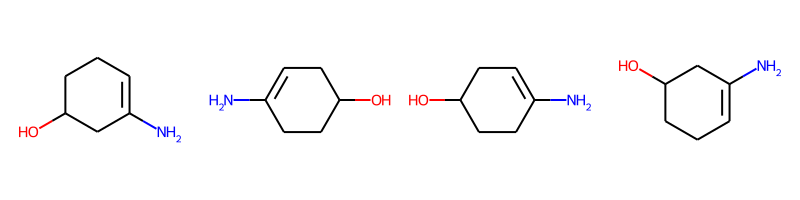

In [40]:
Draw.MolsToGridImage([ps[0][0], ps[1][0], ps[2][0], ps[3][0]], molsPerRow=4)

In [33]:
for i in range(4):
    smi = Chem.MolToSmiles(ps[i][0])
    print(smi)

NC1=CCCC(O)C1
NC1=CCC(O)CC1
NC1=CCC(O)CC1
NC1=CCCC(O)C1
